<a href="https://colab.research.google.com/github/hky4wzy71/python_keras_deep_learning_YSA/blob/main/Ysa_atik_siniflandirma.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt
import  random

from keras.models import Sequential
from keras.layers import  Dense, Dropout, Activation, Flatten
from keras import regularizers
from keras.preprocessing.image import  ImageDataGenerator
import os
from keras.callbacks import  EarlyStopping

from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


Found 1672 images belonging to 6 classes.
Found 206 images belonging to 6 classes.
Found 509 images belonging to 6 classes.


In [ ]:
print("class_indices:",train_generator.class_indices)
print("class_mode:",val_generator.class_mode)
print("classes:",val_generator.classes)

NameError: ignored

Found 1672 images belonging to 6 classes.
Found 206 images belonging to 6 classes.
Found 509 images belonging to 6 classes.


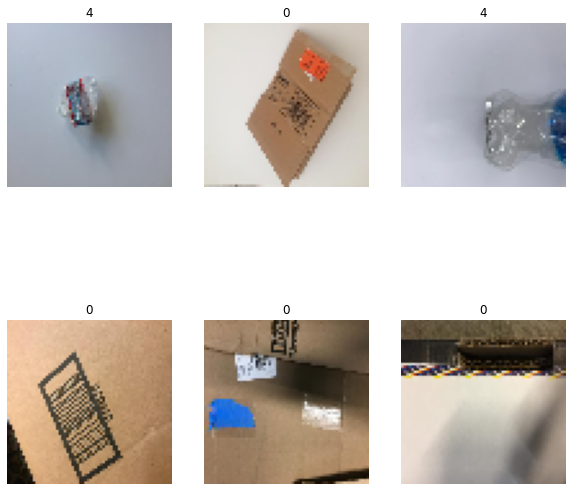

In [ ]:
train_path='/content/drive/MyDrive/Deep Learning/odev_Dataset/train/'
test_path='/content/drive/MyDrive/Deep Learning/odev_Dataset/test'

train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=0.5,         
    zoom_range=0.1,        
    horizontal_flip=True,   
    validation_split=0.2    
)
val_datagen=ImageDataGenerator(rescale=1./255, validation_split=0.1)#%10 istendi
test_datagen=ImageDataGenerator(rescale=1./255)


x,y=(64,64) #image widht,height
train_generator=train_datagen.flow_from_directory(
    train_path,
    target_size=(x,y),         
    class_mode='categorical',  
    batch_size=128,        
    subset='training'    
)

val_generator=val_datagen.flow_from_directory( 
    train_path,
    target_size=(x,y),
    shuffle=False,
    class_mode='categorical',
    batch_size=128,
    subset='validation'
)


test_generator=test_datagen.flow_from_directory( 
    test_path,
    target_size=(x,y),
    shuffle=True,
    class_mode='categorical',
    batch_size=1    
)



plt.figure(figsize=(10,10))

for i in range(6):
  img,y=test_generator.next()
  plt.subplot(2,3,i+1)
  plt.axis('off')
  plt.title(list(y[:195][0]).index(1))
  plt.imshow(img[0])


In [ ]:
model=Sequential()
model.add(Flatten(input_shape=(64,64,3)))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(6,activation='softmax'))
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=['accuracy'])
model.summary()

history=model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples//128,
    validation_data=val_generator,
    epochs=100,
    validation_steps=val_generator.samples//128
)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 12288)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                786496    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 390       
Total params: 791,046
Trainable params: 791,046
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
13/13 [==============================] - 413s 32s/step - loss: 2.5373 - accuracy: 0.1558 - val_loss: 1.7154 - val_accuracy: 0.0234
Epoch 2/100
13/13 [==============================] - 8s 594ms/step - loss: 1.8018 - accuracy: 0.2209 - va

Text(0.5, 1.0, 'Accuracy Curves')

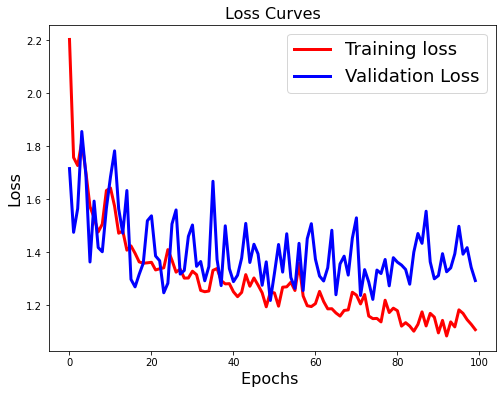

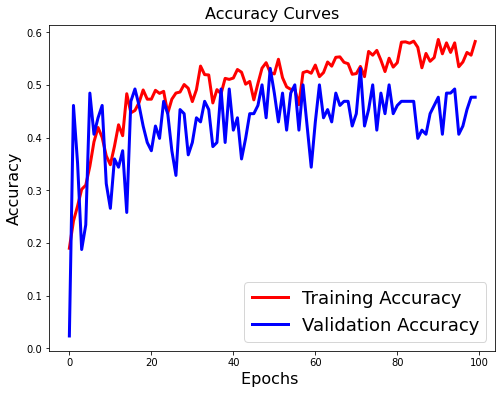

In [ ]:
#Plot the Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'r',linewidth=3.0)
plt.plot(history.history['val_loss'],'b',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)

#Plot the Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['accuracy'],'r',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'b',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
score=model.evaluate(test_generator)
print("Test Loos",score[0])
print("Test Accuracy",score[1]*100)

509/509 [==============================] - 3s 5ms/step - loss: 1.4908 - accuracy: 0.3890
Test Loos 1.4907636642456055
Test Accuracy 38.899803161621094


In [ ]:
Y_pred = model.predict_generator(val_generator, test_generator.samples // 128)
y_pred = np.argmax(Y_pred, axis=1)

print('Confusion Matrix')
print(confusion_matrix(val_generator.classes, y_pred))

target_names = ['1', '2', '3', '4', '5', '6']
print(classification_report(val_generator.classes, y_pred, target_names=target_names))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1905: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


Confusion Matrix
[[20  3 13  1  1  0]
 [ 4  8 18  5  4  1]
 [ 4  0 26  0  2  0]
 [ 9  1 12 20  5  0]
 [ 6  2 19  3  9  0]
 [ 2  1  7  0  0  0]]
              precision    recall  f1-score   support

           1       0.44      0.53      0.48        38
           2       0.53      0.20      0.29        40
           3       0.27      0.81      0.41        32
           4       0.69      0.43      0.53        47
           5       0.43      0.23      0.30        39
           6       0.00      0.00      0.00        10

    accuracy                           0.40       206
   macro avg       0.39      0.37      0.33       206
weighted avg       0.47      0.40      0.39       206

